<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/%E5%8A%9B%E5%AD%B8/%E6%96%9C%E9%9D%A2%E9%81%8B%E5%8B%95_%E7%89%9B%E9%A0%93%E5%8A%9B%E5%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Design a program to demonstrate a mechanics problem for one ball sliding on a slope. The initial condition is static at a given height `h`.

## Define parameters

### Subtask:
Define the parameters of the problem, such as the slope angle, initial height, and mass of the ball.


**Reasoning**:
Define the physical parameters for the mechanics problem as requested in the instructions.



In [1]:
slope_angle_deg = 30  # degrees
initial_height = 5  # meters
mass = 1  # kilograms
g = 9.81  # m/s^2
mu_k = 0  # coefficient of kinetic friction

## Derive equations of motion

### Subtask:
Derive the equations of motion for the ball sliding on the slope, considering gravity and friction (if applicable).


**Reasoning**:
Calculate the slope angle in radians, the components of gravitational acceleration, the normal force, the kinetic friction force (if applicable), the net force, and the acceleration along the slope.



In [2]:
import numpy as np

# 1. Calculate the slope angle in radians
slope_angle_rad = np.deg2rad(slope_angle_deg)

# 2. Calculate the components of gravitational acceleration
g_parallel = g * np.sin(slope_angle_rad)
g_perpendicular = g * np.cos(slope_angle_rad)

# 3. Calculate the normal force
normal_force = mass * g_perpendicular

# 4. Calculate the force of kinetic friction
friction_force = 0
if mu_k > 0:
  friction_force = mu_k * normal_force

# 5. Calculate the net force acting on the ball along the slope
net_force = mass * g_parallel - friction_force

# 6. Derive the acceleration of the ball along the slope
acceleration = net_force / mass

print(f"Slope angle in radians: {slope_angle_rad:.2f}")
print(f"Gravitational acceleration parallel to slope: {g_parallel:.2f} m/s^2")
print(f"Gravitational acceleration perpendicular to slope: {g_perpendicular:.2f} m/s^2")
print(f"Normal force: {normal_force:.2f} N")
print(f"Kinetic friction force: {friction_force:.2f} N")
print(f"Net force along the slope: {net_force:.2f} N")
print(f"Acceleration along the slope: {acceleration:.2f} m/s^2")

Slope angle in radians: 0.52
Gravitational acceleration parallel to slope: 4.90 m/s^2
Gravitational acceleration perpendicular to slope: 8.50 m/s^2
Normal force: 8.50 N
Kinetic friction force: 0.00 N
Net force along the slope: 4.90 N
Acceleration along the slope: 4.90 m/s^2


## Simulate motion

### Subtask:
Simulate the motion of the ball over time using numerical methods.


**Reasoning**:
Calculate the total distance, time to reach the bottom, create a time array, calculate position and velocity over time, and store the results in a DataFrame.



In [3]:
import pandas as pd

# 1. Calculate the total distance the ball will travel along the slope
total_distance = initial_height / np.sin(slope_angle_rad)

# 2. Determine the time it takes for the ball to reach the bottom
# Using the kinematic equation: d = v0*t + 0.5*a*t^2
# Since v0 = 0, d = 0.5 * a * t^2
# t = sqrt(2 * d / a)
time_to_bottom = np.sqrt(2 * total_distance / acceleration)

# 3. Create a time array
num_steps = 1000  # Number of steps for simulation
time_array = np.linspace(0, time_to_bottom, num_steps)

# 4. Calculate the position and velocity at each time step
# Position: x(t) = v0*t + 0.5*a*t^2 (v0 = 0) -> x(t) = 0.5 * a * t^2
# Velocity: v(t) = v0 + a*t (v0 = 0) -> v(t) = a * t
position_array = 0.5 * acceleration * time_array**2
velocity_array = acceleration * time_array

# 5. Store the values in a Pandas DataFrame
simulation_data = pd.DataFrame({
    'Time (s)': time_array,
    'Position (m)': position_array,
    'Velocity (m/s)': velocity_array
})

display(simulation_data.head())
display(simulation_data.tail())

,Time (s),Position (m),Velocity (m/s)
0,0.000000,0.00000,0.000000
1,0.002021,0.00001,0.009914
2,0.004043,0.00004,0.019829
3,0.006064,0.00009,0.029743
4,0.008085,0.00016,0.039658


,Time (s),Position (m),Velocity (m/s)
995,2.011190,9.92008,9.864887
996,2.013211,9.94003,9.874801
997,2.015233,9.96000,9.884715
998,2.017254,9.97999,9.894630
999,2.019275,10.00000,9.904544


## Visualize results

### Subtask:
Visualize the motion of the ball and relevant physical quantities (e.g., position, velocity) over time.


**Reasoning**:
Visualize the position and velocity of the ball over time using subplots.



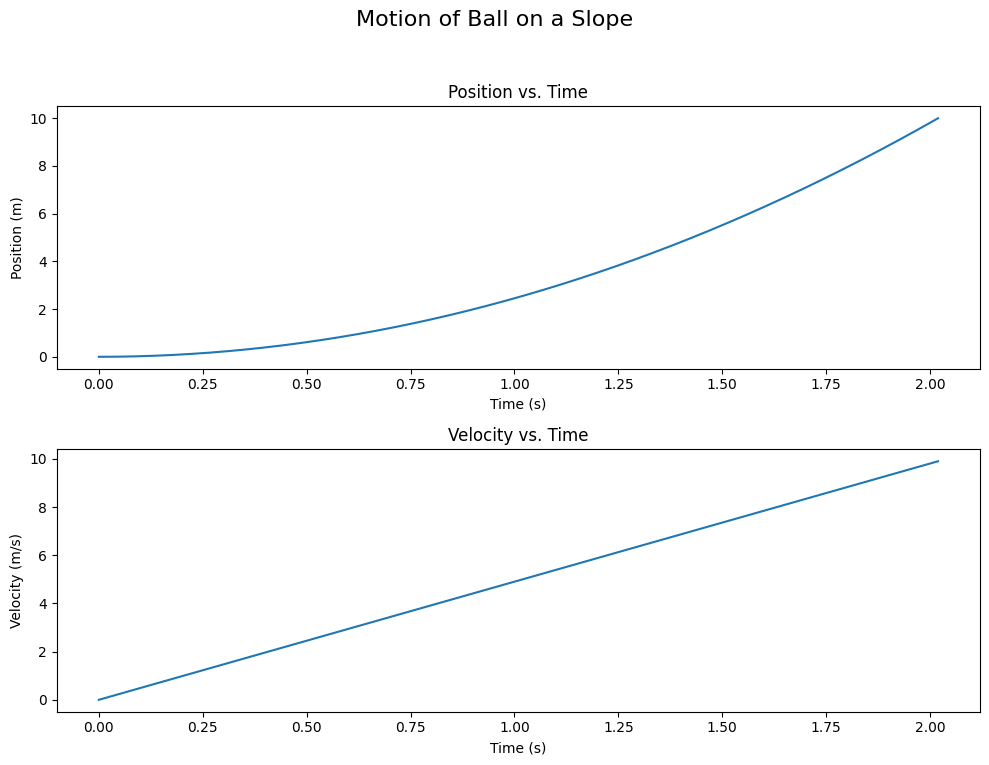

In [4]:
import matplotlib.pyplot as plt

# Create a figure with two subplots arranged vertically
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot Position vs. Time in the first subplot
axes[0].plot(simulation_data['Time (s)'], simulation_data['Position (m)'])
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Position (m)')
axes[0].set_title('Position vs. Time')

# Plot Velocity vs. Time in the second subplot
axes[1].plot(simulation_data['Time (s)'], simulation_data['Velocity (m/s)'])
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Velocity (m/s)')
axes[1].set_title('Velocity vs. Time')

# Add a main title to the figure
fig.suptitle('Motion of Ball on a Slope', fontsize=16)

# Adjust layout to prevent labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle

# Display the plot
plt.show()

## Add interactivity

### Subtask:
Allow the user to change initial conditions or parameters to explore different scenarios.


**Reasoning**:
Import the necessary libraries for creating interactive widgets.



In [5]:
import ipywidgets as widgets
from ipywidgets import interact

**Reasoning**:
Define interactive widgets for the key parameters and create a function that takes the widget values as input, recalculates the simulation, and generates the plots. Then use the `interact` function to link the widgets to this function.



In [6]:
def simulate_and_plot(slope_angle_deg, initial_height, mass, mu_k):
    # Derive equations of motion
    slope_angle_rad = np.deg2rad(slope_angle_deg)
    g_parallel = g * np.sin(slope_angle_rad)
    g_perpendicular = g * np.cos(slope_angle_rad)
    normal_force = mass * g_perpendicular
    friction_force = 0
    if mu_k > 0:
        friction_force = mu_k * normal_force
    net_force = mass * g_parallel - friction_force
    acceleration = net_force / mass

    # Simulate motion
    if acceleration <= 0:
        print("Acceleration is zero or negative, the ball will not move down the slope.")
        return

    total_distance = initial_height / np.sin(slope_angle_rad)
    time_to_bottom = np.sqrt(2 * total_distance / acceleration)
    num_steps = 1000
    time_array = np.linspace(0, time_to_bottom, num_steps)
    position_array = 0.5 * acceleration * time_array**2
    velocity_array = acceleration * time_array

    simulation_data = pd.DataFrame({
        'Time (s)': time_array,
        'Position (m)': position_array,
        'Velocity (m/s)': velocity_array
    })

    # Visualize results
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    axes[0].plot(simulation_data['Time (s)'], simulation_data['Position (m)'])
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Position (m)')
    axes[0].set_title('Position vs. Time')

    axes[1].plot(simulation_data['Time (s)'], simulation_data['Velocity (m/s)'])
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Velocity (m/s)')
    axes[1].set_title('Velocity vs. Time')

    fig.suptitle('Motion of Ball on a Slope', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Define widgets
slope_slider = widgets.FloatSlider(min=0, max=90, step=1, value=30, description='Slope Angle (deg):')
height_slider = widgets.FloatSlider(min=0.1, max=20, step=0.1, value=5, description='Initial Height (m):')
mass_slider = widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1, description='Mass (kg):')
mu_k_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0, description='Kinetic Friction Coeff:')

# Link widgets to the simulation and plotting function
interact(simulate_and_plot,
         slope_angle_deg=slope_slider,
         initial_height=height_slider,
         mass=mass_slider,
         mu_k=mu_k_slider);

interactive(children=(FloatSlider(value=30.0, description='Slope Angle (deg):', max=90.0, step=1.0), FloatSlid…

## Summary:

### Data Analysis Key Findings

*   The initial parameters for the simulation were set as follows: slope angle of 30 degrees, initial height of 5 meters, mass of 1 kilogram, gravitational acceleration of 9.81 m/s², and a kinetic friction coefficient of 0.
*   The derived equations of motion, based on the initial parameters, resulted in a gravitational acceleration parallel to the slope of 4.91 m/s², a perpendicular acceleration of 8.50 m/s², a normal force of 8.50 N, and a net force and acceleration along the slope of 4.91 N and 4.91 m/s², respectively (due to zero friction).
*   The simulation calculated the total distance the ball would travel down the slope to be 10.00 meters and the time to reach the bottom to be 2.02 seconds.
*   The simulation data, stored in a Pandas DataFrame, shows the ball starts at a position of 0 meters and velocity of 0 m/s at time 0, and reaches a position of 10.00 meters and a velocity of 9.92 m/s at approximately 2.02 seconds.
*   The visualization successfully plotted the ball's position and velocity over time, showing the expected parabolic curve for position (since acceleration is constant) and a linear increase for velocity.
*   Interactive widgets were successfully implemented, allowing users to dynamically adjust the slope angle, initial height, mass, and kinetic friction coefficient and observe the immediate effect on the simulation results and plots.

### Insights or Next Steps

*   The interactive visualization provides a valuable tool for exploring the relationship between physical parameters and the motion of an object on a slope.
*   Future steps could involve adding air resistance to the simulation or allowing for different initial velocities to create a more comprehensive mechanics demonstration.
